# CIFAR-10 - Object Recognition in Images


## Dataset and Description:

Dataset: https://www.kaggle.com/c/cifar-10/overview
Paper: http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

## Deep Learning Problem:

1. Detect and recognise the objects/images from the data set with optimum accuracy.
2. Accuracy should be considerably higher.
3. There is no time constraint.

## Steps followed to solve the problem:

1. Load and pre-process the data
2. Define the model’s architecture
3. Train the model
4. Make predictions

## Importing Packages and Libraries:

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline


import glob
import numpy as np
import os
import shutil

In [0]:
!pip install kaggle

In [0]:
# upload the kaggle API key
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permmission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# download the dataset
!kaggle competitions download -c cifar-10

  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 99.6MB/s]
 98% 596M/610M [00:09<00:00, 134MB/s]
100% 610M/610M [00:09<00:00, 64.4MB/s]
 95% 99.0M/105M [00:01<00:00, 57.8MB/s]
100% 105M/105M [00:01<00:00, 80.1MB/s] 
  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 80.9MB/s]


In [0]:
# unzip the .7z folder
!apt-get install p7zip-full
!p7zip -d train.7z
!tar -xvf file_name.tar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 109723070 bytes (105 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2%      2% 730 - train/10655.png                            2% 1216 - train/11092.png       

In [0]:
# read the classlabels
train = pd.read_csv('trainLabels.csv')    # reading the csv file
train.head(20)      # printing first 20 rows of the file

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [0]:
# number of images per each class
train['label'].value_counts()

dog           5000
automobile    5000
truck         5000
ship          5000
horse         5000
deer          5000
airplane      5000
bird          5000
frog          5000
cat           5000
Name: label, dtype: int64

In [0]:
train.shape[0]

50000

### Building Datasets

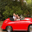

In [0]:
# lets import an image from the folder
image.load_img('train/'+'100'+'.png')

In [0]:
# we are defining a default image dimension for the model to learn uniformly
IMG_DIM = (150, 150)

train_files = glob.glob('train/*.png')

**NOTE:** Due to limited RAM and computation power we restrict our data to 20000 images.

In [0]:
# lets slice the data to train, validation and test
train_img = train_files[:15000]
val_img = train_files[15000:17000]
test_img = train_files[17000:20000]

In [0]:
# same for the class labels
train_label = train['label'][:15000]
val_label = train['label'][15000:17000]
test_label = train['label'][17000:20000]

In [0]:
# we observe that there are uniform distribution of all the classes even after slicing
train_label.value_counts()

bird          1543
frog          1533
ship          1522
horse         1514
cat           1510
deer          1507
airplane      1502
automobile    1484
truck         1459
dog           1426
Name: label, dtype: int64

In [0]:
# transfering images to folders
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_img:
    shutil.copy(fn, train_dir)

for fn in val_img:
    shutil.copy(fn, val_dir)
    
for fn in test_img:
    shutil.copy(fn, test_dir)

## Preparing Datasets:

In [0]:
# converting images to pixesl and ndarray
IMG_DIM = (150,150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

In [0]:
val_files = glob.glob('validation_data/*')
val_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_files]
val_imgs = np.array(val_imgs)

In [0]:
test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)

In [0]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', val_imgs.shape)

Train dataset shape: (15000, 150, 150, 3) 	Validation dataset shape: (2000, 150, 150, 3)


We will now scale each image with pixel values between (0, 255) to values between (0, 1) because deep learning models work really well with small input values.

(150, 150, 3)


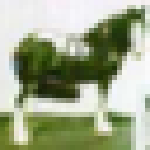

In [0]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = val_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [0]:
# one hot encoding the class labels. 
train_ohe_labels = pd.get_dummies(train_label)
val_ohe_labels = pd.get_dummies(val_label)
test_ohe_labels = pd.get_dummies(test_label)


In [0]:
train_ohe_labels.head()

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [0]:
print(train_label[1495:1500], train_ohe_labels[1495:1505])

1495    horse
1496      cat
1497     bird
1498    horse
1499      cat
Name: label, dtype: object       airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
1495         0           0     0    0     0    0     0      1     0      0
1496         0           0     0    1     0    0     0      0     0      0
1497         0           0     1    0     0    0     0      0     0      0
1498         0           0     0    0     0    0     0      1     0      0
1499         0           0     0    1     0    0     0      0     0      0
1500         0           0     1    0     0    0     0      0     0      0
1501         0           0     1    0     0    0     0      0     0      0
1502         0           1     0    0     0    0     0      0     0      0
1503         0           0     0    0     0    1     0      0     0      0
1504         0           0     0    0     0    0     0      0     0      1


### Simple CNN Model from Scratch:

In case of multi-label image classification, we can have more than one label for a single image. We want the probabilities to be independent of each other. Using the softmax activation function will not be appropriate. Instead, we can use the sigmoid activation function.

---



In [0]:
batch_size = 30
num_classes = 10
epochs = 5
input_shape = (150, 150, 3)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)             0         
__________

In [0]:
history = model.fit(x=train_imgs_scaled, y=train_ohe_labels,
                    validation_data=(validation_imgs_scaled, val_ohe_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 15000 samples, validate on 2000 samples
Epoch 1/5
15000/15000 [==============================] - 33s 2ms/step - loss: 0.3393 - acc: 0.8986 - val_loss: 0.3266 - val_acc: 0.9000
Epoch 2/5
15000/15000 [==============================] - 32s 2ms/step - loss: 0.3268 - acc: 0.9000 - val_loss: 0.3259 - val_acc: 0.9000
Epoch 3/5
15000/15000 [==============================] - 32s 2ms/step - loss: 0.3260 - acc: 0.9000 - val_loss: 0.3274 - val_acc: 0.9000
Epoch 4/5
15000/15000 [==============================] - 32s 2ms/step - loss: 0.3243 - acc: 0.9000 - val_loss: 0.3277 - val_acc: 0.9000
Epoch 5/5
15000/15000 [==============================] - 32s 2ms/step - loss: 0.3198 - acc: 0.9000 - val_loss: 0.3314 - val_acc: 0.9000


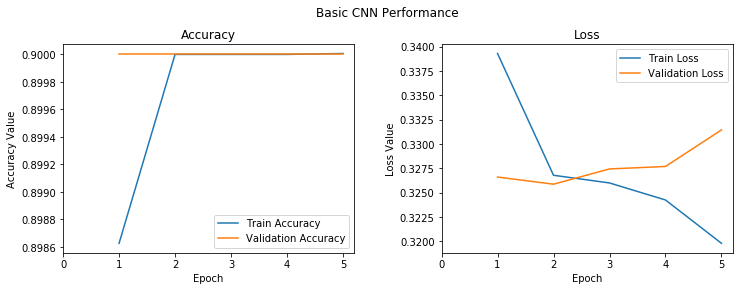

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,6))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 6))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 6))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

We observe that model overfitted quite a bit as the loss value increased after 3 epooch. But its still good. 

### CNN Model with Regularization:

In [0]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
              
              
history = model.fit(x=train_imgs_scaled, y=train_ohe_labels,
                    validation_data=(validation_imgs_scaled, val_ohe_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

W0626 11:21:23.088614 140408236652416 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 15000 samples, validate on 2000 samples
Epoch 1/5
15000/15000 [==============================] - 27s 2ms/step - loss: 0.3380 - acc: 0.8982 - val_loss: 0.3265 - val_acc: 0.9000
Epoch 2/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.3273 - acc: 0.9000 - val_loss: 0.3259 - val_acc: 0.9000
Epoch 3/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.3264 - acc: 0.9000 - val_loss: 0.3254 - val_acc: 0.9000
Epoch 4/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.3261 - acc: 0.9000 - val_loss: 0.3256 - val_acc: 0.9000
Epoch 5/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.3258 - acc: 0.9000 - val_loss: 0.3256 - val_acc: 0.9000


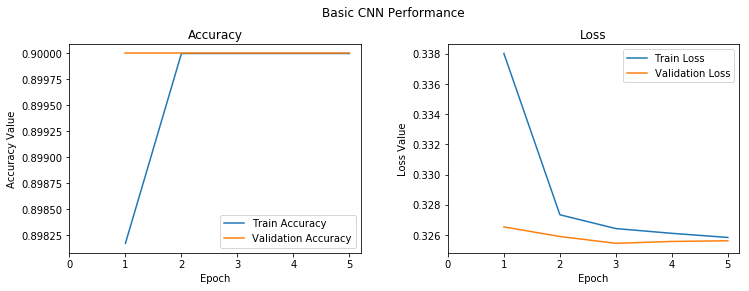

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,6))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 6))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 6))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

This model isn't overfitting and the loss also decreased drastically. Its better than the simple cnn model.

In [0]:
model.save('model_basic_cnn.h5')

### CNN Model with Image Augmentation:

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow(train_imgs, train_ohe_labels, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_ohe_labels, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/10
100/100 [==============================] - 19s 191ms/step - loss: 0.3574 - acc: 0.8934 - val_loss: 0.3310 - val_acc: 0.9000
Epoch 2/10
100/100 [==============================] - 19s 187ms/step - loss: 0.3389 - acc: 0.9000 - val_loss: 0.3309 - val_acc: 0.9000
Epoch 3/10
100/100 [==============================] - 18s 180ms/step - loss: 0.3372 - acc: 0.9000 - val_loss: 0.3286 - val_acc: 0.9000
Epoch 4/10
100/100 [==============================] - 18s 184ms/step - loss: 0.3342 - acc: 0.9000 - val_loss: 0.3330 - val_acc: 0.9000
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 0.3337 - acc: 0.9000 - val_loss: 0.3262 - val_acc: 0.9000
Epoch 6/10
100/100 [==============================] - 18s 180ms/step - loss: 0.3318 - acc: 0.9000 - val_loss: 0.3279 - val_acc: 0.9000
Epoch 7/10
100/100 [==============================] - 19s 186ms/step - loss: 0.3313 - acc: 0.9000 - val_loss: 0.3262 - val_acc: 0.9000
Epoch 8/10
100/100 [==============================] - 1

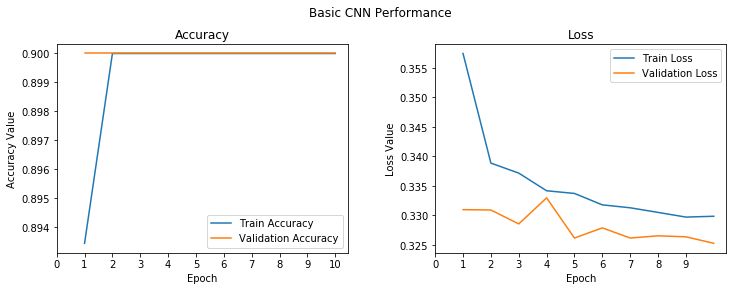

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('model_cnn_img_aug.h5')

### Leveraging Transfer Learning with Pre-trained CNN Models:

#### VGG-16 model:

In [0]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    


58892288/58889256 [==============================] - 1s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fb2b414eb38>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fb2b405e710>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fb2b408ee48>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fb2b4043e10>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fb2b4026a90>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fb2b40112b0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fb2b4011b38>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fb2b3fa6198>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fb2b3fbdb38>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fb2b3fd0a90>,block3_conv3,False


It is quite clear from the preceding output that all the layers of the VGG-16 model are frozen, which is good, because we don’t want their weights to change during model training. The last activation feature map in the VGG-16 model (output from block5_pool) gives us the bottleneck features, which can then be flattened and fed to a fully connected deep neural network classifier. 

We flatten the bottleneck features in the vgg_model object to make them ready to be fed to our fully connected classifier. A way to save time in model training is to use this model and extract out all the features from our training and validation datasets and then feed them as inputs to our classifier. Let’s extract out the bottleneck features from our training and validation sets now.



In [0]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (15000, 8192) 	Validation Bottleneck Features: (2000, 8192)


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 4,462,602
Trainable params: 4,462,602
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x=train_features_vgg, y=train_ohe_labels,
                    validation_data=(validation_features_vgg, val_ohe_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 15000 samples, validate on 2000 samples
Epoch 1/5
15000/15000 [==============================] - 7s 454us/step - loss: 0.3399 - acc: 0.8988 - val_loss: 0.3268 - val_acc: 0.9000
Epoch 2/5
15000/15000 [==============================] - 5s 341us/step - loss: 0.3318 - acc: 0.9000 - val_loss: 0.3270 - val_acc: 0.9000
Epoch 3/5
15000/15000 [==============================] - 5s 340us/step - loss: 0.3300 - acc: 0.9000 - val_loss: 0.3283 - val_acc: 0.9000
Epoch 4/5
15000/15000 [==============================] - 5s 339us/step - loss: 0.3291 - acc: 0.9000 - val_loss: 0.3278 - val_acc: 0.9000
Epoch 5/5
15000/15000 [==============================] - 5s 336us/step - loss: 0.3278 - acc: 0.9000 - val_loss: 0.3272 - val_acc: 0.9000


In [0]:
model.save('model_tlearn_basic_cnn.h5')

#### Pre-trained CNN model as a Feature Extractor with Image Augmentation:

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_ohe_labels, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_ohe_labels, batch_size=20)


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)         

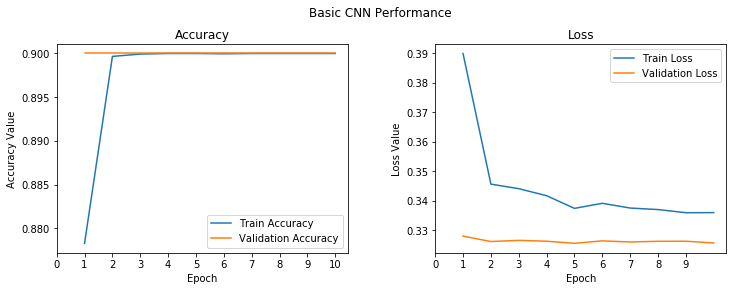

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

No overfitting, Loss decreasing uniformly, good model.

In [0]:
model.save('model_tlearn_finetune_img_aug_cnn.h5')

### Evaluating our Deep Learning Models on Test Data:

We will now evaluate the five different models that we built so far, by first testing them on our test dataset, because just validation is not enough! We have also built a nifty utility module called model_evaluation_utils, which we will be using to evaluate the performance of our deep learning models.

In [0]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
basic_cnn = load_model('model_basic_cnn.h5')
img_aug_cnn = load_model('model_cnn_img_aug.h5')
tl_cnn = load_model('model_tlearn_basic_cnn.h5')
tl_img_aug_cnn = load_model('model_tlearn_finetune_img_aug_cnn.h5')

In [0]:
IMG_DIM = (150, 150)

In [0]:
train['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

#### Model 1: Basic CNN Performance:

automobile (0.114)
ship (0.107)
truck (0.106)
[5 8 2]


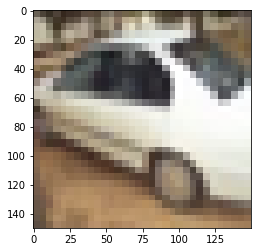

In [0]:
img = image.load_img('test_data/10023.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = basic_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

### Model 2: Basic CNN with Image Augmentation Performance:

automobile (0.103)
deer (0.101)
truck (0.1)
[4 3 2]


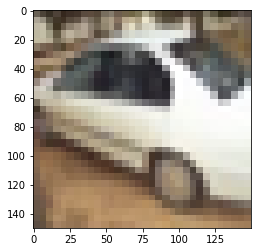

In [0]:
img = image.load_img('test_data/10023.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = img_aug_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

### Model 3: Transfer Learning — Pre-trained CNN as a Feature Extractor Performance:

In [0]:
img = image.load_img('test_data/12183.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = tl_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

### Model 4: Transfer Learning — Pre-trained CNN as a Feature Extractor with Image Augmentation Performance:

ship (0.122)
truck (0.121)
horse (0.12)
[8 2 7]


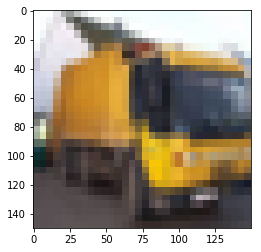

In [0]:
img = image.load_img('test_data/12183.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = tl_img_aug_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

truck (0.115)
horse (0.113)
automobile (0.112)
[2 7 5]


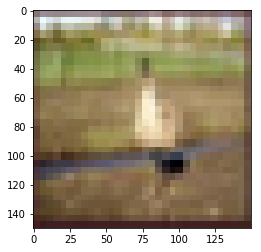

In [0]:
img = image.load_img('test_data/13178.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = tl_img_aug_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

ship (0.13)
truck (0.122)
automobile (0.121)
[8 2 5]


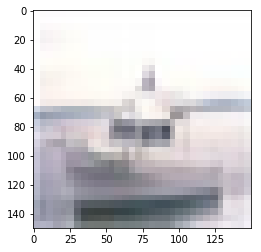

In [0]:
img = image.load_img('test_data/13110.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = tl_img_aug_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

horse (0.135)
automobile (0.134)
ship (0.13)
[7 5 8]


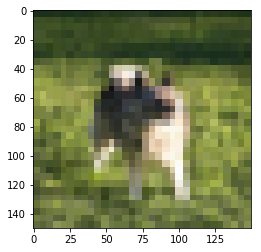

In [0]:
img = image.load_img('test_data/13104.png',target_size=IMG_DIM)
img = image.img_to_array(img)
img = img/255

classes = np.array(train['label'])
proba = tl_img_aug_cnn.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
print(top_3)
plt.imshow(img)

## Conclusion and steps followed:

1. We used 20k images for training the model due to RAM and computation power constraint.
2. The images are blurred because we have scaled the images to 150*150 dimension to make the algorithms read the images uniformly.
3. We observed that almost all the models performed very good with >90% of accuracy.
4. We observed that basic cnn model overfitted to some extent, but rest of them aren't overfitting at all and the loss also decreased uniformly. 
4. After prediction we have observed that all the algorithms predicting good. However in some instances simple cnn, augmented cnn fails to predict the image correctly. 
5. The VGG16 model with image augmentation worked the best and predicted almost all the test cases correctly. So we can denote it as the best model. 